In [3]:
import pandas as pd 
dataset=pd.read_csv("insurance_pre.csv")

In [5]:
# Check if any categorical data exist then convert into numerical values for Sex column => using One Hot Encoding
# 2 unique values and column expansion happened for Sex and Smoker Column (Sex column expanded to sex_male,sex_female and smoker column expanded to smoker_yes and smoker_no)
# Reptation should be there and need to remove the dummy any one of column out of 2 unique values
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [7]:
independent =dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [9]:
dependent=dataset[["charges"]]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [251]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='log2')
regressor=regressor.fit(x_train,y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

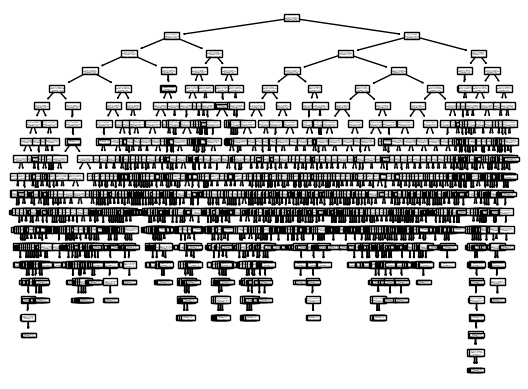

In [253]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show

In [255]:
y_pred=regressor.predict(x_test)

In [257]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [259]:
r_score

0.6401339603819005